In [1]:
import json

In [3]:
with open("/home/jinho/FlagEmbedding_Aizip/beir/aizip/search_result/20250220_1640/bge-m3/bge-reranker-v2-m3/sb_qna-test.json", "r") as f:
    result = json.loads(f.read())

In [8]:
with open("/home/jinho/FlagEmbedding_Aizip/beir/data/sb_qna/test_qrels.jsonl", "r", encoding="utf-8") as f:
    qrels = [json.loads(line) for line in f]

In [13]:
qrels

[{'qid': '0', 'docid': '100000', 'relevance': 1},
 {'qid': '1', 'docid': '100000', 'relevance': 1},
 {'qid': '2', 'docid': '100000', 'relevance': 1},
 {'qid': '3', 'docid': '100000', 'relevance': 1},
 {'qid': '4', 'docid': '100001', 'relevance': 1},
 {'qid': '5', 'docid': '100001', 'relevance': 1},
 {'qid': '6', 'docid': '100001', 'relevance': 1},
 {'qid': '7', 'docid': '100001', 'relevance': 1},
 {'qid': '8', 'docid': '100001', 'relevance': 1},
 {'qid': '9', 'docid': '100001', 'relevance': 1},
 {'qid': '10', 'docid': '100001', 'relevance': 1},
 {'qid': '11', 'docid': '100001', 'relevance': 1},
 {'qid': '12', 'docid': '100001', 'relevance': 1},
 {'qid': '13', 'docid': '100001', 'relevance': 1},
 {'qid': '14', 'docid': '100002', 'relevance': 1},
 {'qid': '15', 'docid': '100002', 'relevance': 1},
 {'qid': '16', 'docid': '100002', 'relevance': 1},
 {'qid': '17', 'docid': '100002', 'relevance': 1},
 {'qid': '18', 'docid': '100002', 'relevance': 1},
 {'qid': '19', 'docid': '100002', 'releva

In [14]:
result['search_results']['0']

{'100000': 2.958984375, '100697': -1.021484375, '100021': -0.49658203125}

In [21]:
correct = []
incorrect = []
for d in qrels:
    qid = d['qid']
    docid = d['docid']
    retrieved_id = list(result['search_results'][qid].keys())
    if docid in retrieved_id:
        correct.append(qid)
    else:
        incorrect.append({'qid': qid, 'gt': docid, 'retrieved': retrieved_id})

In [22]:
len(correct) / (len(correct) + len(incorrect))

0.8021118129537098

In [23]:
incorrect

[{'qid': '14', 'gt': '100002', 'retrieved': ['101162', '101173', '100279']},
 {'qid': '15', 'gt': '100002', 'retrieved': ['101662', '101145', '100246']},
 {'qid': '16', 'gt': '100002', 'retrieved': ['100603', '101662', '101320']},
 {'qid': '19', 'gt': '100002', 'retrieved': ['101662', '101117', '100504']},
 {'qid': '20', 'gt': '100002', 'retrieved': ['101320', '100210', '100528']},
 {'qid': '26', 'gt': '100003', 'retrieved': ['101549', '100628', '100826']},
 {'qid': '53', 'gt': '100007', 'retrieved': ['101229', '100882', '100060']},
 {'qid': '54', 'gt': '100007', 'retrieved': ['101549', '100584', '100688']},
 {'qid': '55', 'gt': '100007', 'retrieved': ['101399', '100636', '100985']},
 {'qid': '61', 'gt': '100007', 'retrieved': ['100252', '100584', '101026']},
 {'qid': '66', 'gt': '100009', 'retrieved': ['100039', '100143', '101093']},
 {'qid': '67', 'gt': '100009', 'retrieved': ['100143', '100915', '101314']},
 {'qid': '68', 'gt': '100009', 'retrieved': ['100610', '101153', '100039']},

In [1]:
import re

def parse_markdown_tables(md_text):
    sections = re.split(r'##\s+', md_text)
    tables = {}
    
    for section in sections[1:]:  # Skip the first split part before first '##'
        lines = section.split("\n")
        title = lines[0].strip()
        table_lines = [line for line in lines[1:] if '|' in line]
        
        if table_lines:
            headers = [h.strip() for h in table_lines[0].split('|')[1:-1]]  # Remove empty first/last from split
            data = [[cell.strip() for cell in row.split('|')[1:-1]] for row in table_lines[2:]]  # Skip headers and separators
            
            tables[title] = {"headers": headers, "rows": data}
    
    return tables

In [6]:
recall_3 = []
no_rank_3 = []
recall_4 = []
no_rank_4 = []
recall_5 = []
no_rank_5 = []

In [12]:
alpha_values = [0.1 * i for i in range(1)]

In [13]:
rank_depth = 5

In [14]:
OUTPUT_DIR = "/home/jinho/FlagEmbedding_Aizip/beir/aizip/results_hybrid/tesla_manual"

In [15]:
for alpha in alpha_values:
    with open(f"{OUTPUT_DIR}/alpha_{alpha}_rank_{rank_depth}.md", "r", encoding="utf-8") as file:
        md_text = file.read()

        tables = parse_markdown_tables(md_text)

        rows = tables['recall_at_3']['rows']

        for r in rows:
            if 'bge-reranker-large' in r:
                recall_3.append(float(r[3].replace("*", "")))
            else:
                no_rank_3.append(float(r[3].replace("*", "")))

        rows = tables['recall_at_4']['rows']

        for r in rows:
            if 'bge-reranker-large' in r:
                recall_4.append(float(r[3].replace("*", "")))
            else:
                no_rank_4.append(float(r[3].replace("*", "")))

        rows = tables['recall_at_5']['rows']

        for r in rows:
            if 'bge-reranker-large' in r:
                recall_5.append(float(r[3].replace("*", "")))
            else:
                no_rank_5.append(float(r[3].replace("*", "")))

        # depths.append(i)


In [18]:
import os
os.makedirs(f"{OUTPUT_DIR}/sweep_figures", exist_ok=True)

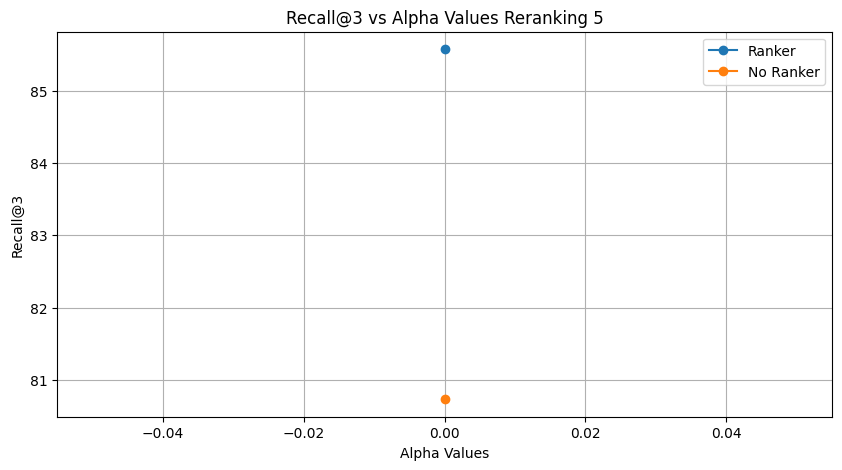

In [21]:
import matplotlib.pyplot as plt
# Plot the results
plt.figure(figsize=(10, 5))
# plt.plot(depths, recall_10, marker='o', linestyle='-', label='Recall@10')
plt.plot(alpha_values, recall_3, marker='o', linestyle='-', label='Ranker')
plt.plot(alpha_values, no_rank_3, marker='o', linestyle='-', label='No Ranker')
plt.xlabel('Alpha Values')
plt.ylabel('Recall@3')
plt.title(f'Recall@3 vs Alpha Values Reranking {rank_depth}')
plt.legend()
plt.grid()
plt.savefig(f"{OUTPUT_DIR}/sweep_figures/recall@3.png", dpi=300, bbox_inches='tight')
plt.show()

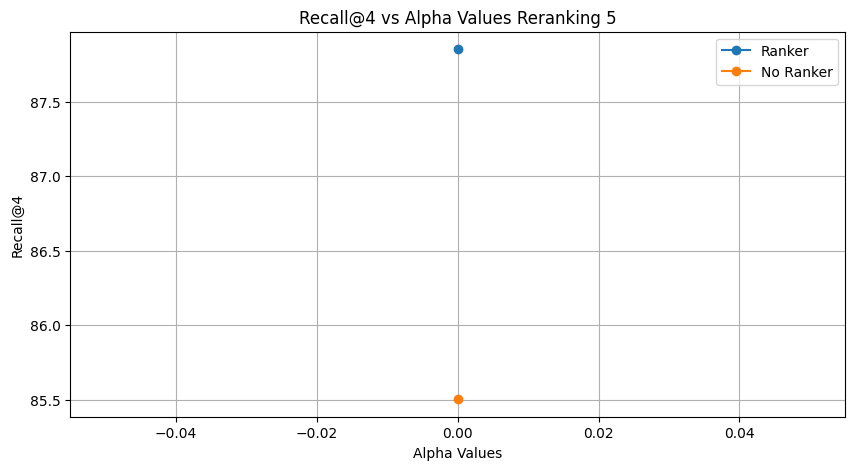

In [22]:
import matplotlib.pyplot as plt
# Plot the results
plt.figure(figsize=(10, 5))
# plt.plot(depths, recall_10, marker='o', linestyle='-', label='Recall@10')
plt.plot(alpha_values, recall_4, marker='o', linestyle='-', label='Ranker')
plt.plot(alpha_values, no_rank_4, marker='o', linestyle='-', label='No Ranker')
plt.xlabel('Alpha Values')
plt.ylabel('Recall@4')
plt.title(f'Recall@4 vs Alpha Values Reranking {rank_depth}')
plt.legend()
plt.grid()
plt.savefig(f"{OUTPUT_DIR}/sweep_figures/recall@4.png", dpi=300, bbox_inches='tight')
plt.show()

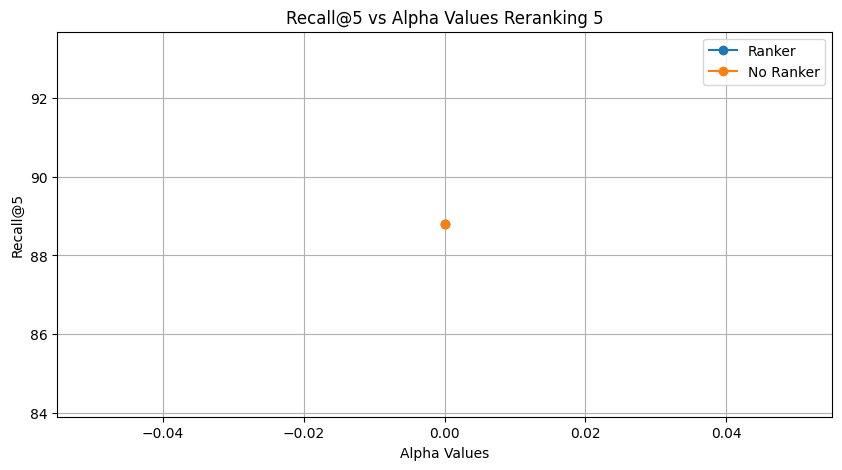

In [23]:
import matplotlib.pyplot as plt
# Plot the results
plt.figure(figsize=(10, 5))
# plt.plot(depths, recall_10, marker='o', linestyle='-', label='Recall@10')
plt.plot(alpha_values, recall_5, marker='o', linestyle='-', label='Ranker')
plt.plot(alpha_values, no_rank_5, marker='o', linestyle='-', label='No Ranker')
plt.xlabel('Alpha Values')
plt.ylabel('Recall@5')
plt.title(f'Recall@5 vs Alpha Values Reranking {rank_depth}')
plt.legend()
plt.grid()
plt.savefig(f"{OUTPUT_DIR}/sweep_figures/recall@5.png", dpi=300, bbox_inches='tight')
plt.show()